In [1]:
#sri rama jayam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
del_2024=pd.read_csv('.\Cricsheet\ipl_2024_deliveries.csv')
print(del_2024.head().to_string())
print(del_2024.columns)
print("\n\n")

mat_2024=pd.read_csv('.\Cricsheet\ipl_2024_matches.csv')
print(mat_2024.columns)
print(mat_2024.head().to_string())

   match_id  season  match_no        date                                              venue batting_team bowling_team  innings  over       striker   non_striker     bowler  runs_of_bat  extras  wide  legbyes  byes  noballs wicket_type player_dismissed fielder
0    202401    2024         1  2024-03-22  MA Chidambaram Stadium, Chepauk, Chennai, Chennai          RCB          CSK        1   0.1       V Kohli  F du Plessis  DL Chahar            0       1     1        0     0        0         NaN              NaN     NaN
1    202401    2024         1  2024-03-22  MA Chidambaram Stadium, Chepauk, Chennai, Chennai          RCB          CSK        1   0.1       V Kohli  F du Plessis  DL Chahar            1       0     0        0     0        0         NaN              NaN     NaN
2    202401    2024         1  2024-03-22  MA Chidambaram Stadium, Chepauk, Chennai, Chennai          RCB          CSK        1   0.2  F du Plessis       V Kohli  DL Chahar            0       0     0        0     0   

In [3]:
#Batsmen
batsman = pd.DataFrame(columns=['player', 'runs', 'balls', 'outs'])

for idx, row in del_2024.iterrows():
    striker = row['striker']
    
    if striker in batsman['player'].values:
        batsman.loc[batsman['player'] == striker, 'runs'] += row['runs_of_bat']
        batsman.loc[batsman['player'] == striker, 'balls'] += 1
        if row['player_dismissed'] == striker:
            batsman.loc[batsman['player'] == striker, 'outs'] += 1
    else:
        new_row = pd.DataFrame({
            'player': [striker],
            'runs': [row['runs_of_bat']],
            'balls': [1],
            'outs': [1 if row['player_dismissed'] == striker else 0]
        })
        batsman = pd.concat([batsman, new_row], ignore_index=True)

print(batsman)


                 player runs balls outs
0               V Kohli  741   497   12
1          F du Plessis  438   276   14
2            RM Patidar  395   237   13
3            GJ Maxwell   52    46    9
4               C Green  255   185    8
..                  ...  ...   ...  ...
165       Naveen-ul-Haq    2     4    0
166    T Kohler-Cadmore   48    54    3
167        Shivam Singh    2     3    0
168        V Viyaskanth    7     5    0
169  Rahmanullah Gurbaz   62    50    2

[170 rows x 4 columns]


In [4]:
#Bowlers
bowler = pd.DataFrame(columns=['player', 'runs', 'balls', 'wickets'])

for idx, row in del_2024.iterrows():
    bowler_name = row['bowler']
    
    if bowler_name in bowler['player'].values:
        bowler.loc[bowler['player'] == bowler_name, 'runs'] += row['runs_of_bat']
        bowler.loc[bowler['player'] == bowler_name, 'balls'] += 1
        if not pd.isna(row['player_dismissed']):
            bowler.loc[bowler['player'] == bowler_name, 'wickets'] += 1
    else:
        new_row = pd.DataFrame({
            'player': [bowler_name],
            'runs': [row['runs_of_bat']],
            'balls': [1],
            'wickets': [1 if not pd.isna(row['player_dismissed']) else 0]
        })
        bowler = pd.concat([bowler, new_row], ignore_index=True)

print(bowler.head())


              player runs balls wickets
0          DL Chahar  197   146       5
1       TU Deshpande  401   310      18
2       M Theekshana  143   121       2
3  Mustafizur Rahman  299   225      14
4          RA Jadeja  366   285       8


C:\Users\india\AppData\Local\Temp\ipykernel_32944\3748396989.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  batsman = batsman.replace([np.inf, -np.inf], np.nan).dropna(subset=['average', 'strike_rate'])


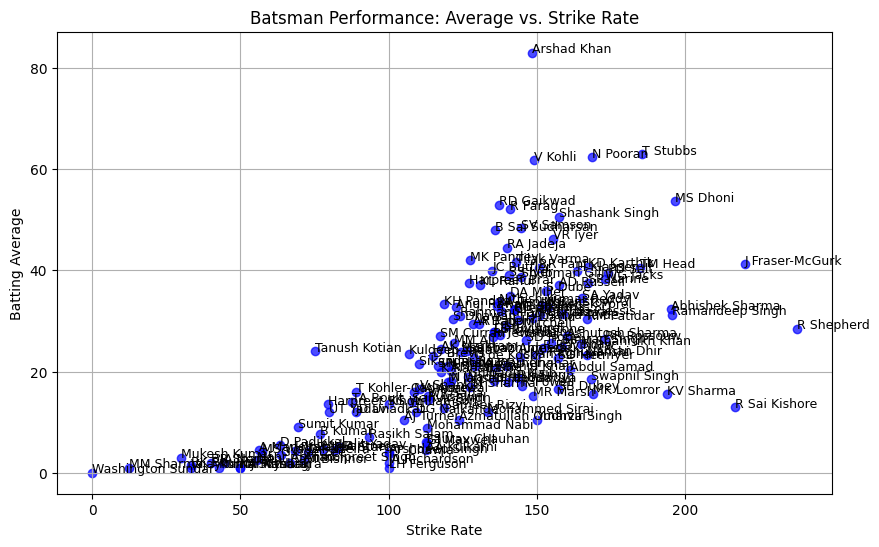

In [5]:
#Strike rate vs Average
batsman['average'] = batsman.apply(lambda x: x['runs'] / x['outs'] if x['outs'] > 0 else np.nan, axis=1)
batsman['strike_rate'] = (batsman['runs'] / batsman['balls']) * 100

batsman = batsman.replace([np.inf, -np.inf], np.nan).dropna(subset=['average', 'strike_rate'])

plt.figure(figsize=(10, 6))
plt.scatter(batsman['strike_rate'], batsman['average'], color='b', alpha=0.7)

for i, player in batsman.iterrows():
    plt.text(player['strike_rate'], player['average'], player['player'], fontsize=9)

plt.xlabel('Strike Rate')
plt.ylabel('Batting Average')
plt.title('Batsman Performance: Average vs. Strike Rate')
plt.grid(True)
plt.show()


In [4]:
rows = []

for index, match_row in mat_2024.iterrows():
    match_id = match_row['match_id']
    team_1 = match_row['team1']
    team_2 = match_row['team2']
    venue = match_row['venue']
    winning_team = match_row['winning_team']
    
    target = 1 if winning_team == team_1 else 2

    match_deliveries = del_2024[del_2024['match_id'] == match_id]

    cumulative_runs_innings_1 = 0
    cumulative_wickets_innings_1 = 0
    cumulative_runs_innings_2 = 0
    cumulative_wickets_innings_2 = 0

    ball_counter_innings_1 = 0
    ball_counter_innings_2 = 0

    for _, delivery in match_deliveries.iterrows():
        batting_team = delivery['batting_team']
        bowling_team = delivery['bowling_team']
        innings = delivery['innings']
        
        runs_scored = delivery['runs_of_bat'] + delivery['extras']
        
        over = delivery['over']
        balls_bowled = int(over) * 6 + int((over - int(over)) * 10)

        if innings == 1:
            ball_counter_innings_1 += 1
            cumulative_runs_innings_1 += runs_scored
            wicket_lost = 1 if pd.notna(delivery['wicket_type']) else 0
            cumulative_wickets_innings_1 += wicket_lost
            cumulative_runs = cumulative_runs_innings_1
            cumulative_wickets = cumulative_wickets_innings_1
            ball_number = ball_counter_innings_1
        else:
            ball_counter_innings_2 += 1
            cumulative_runs_innings_2 += runs_scored
            wicket_lost = 1 if pd.notna(delivery['wicket_type']) else 0
            cumulative_wickets_innings_2 += wicket_lost
            cumulative_runs = cumulative_runs_innings_2
            cumulative_wickets = cumulative_wickets_innings_2
            ball_number = ball_counter_innings_2

        rows.append({
            'match_id': match_id,
            'team-1': team_1,
            'team-2': team_2,
            'batting_team': batting_team,
            'bowling_team': bowling_team,
            'runs_scored': cumulative_runs,
            'wickets_lost': cumulative_wickets,
            'extras': delivery['extras'],
            'ball_number': ball_number,
            'venue': venue,
            'target': target
        })

df = pd.DataFrame(rows)

print(df.to_string())


       match_id team-1 team-2 batting_team bowling_team  runs_scored  wickets_lost  extras  ball_number                                                                  venue  target
0        202401    RCB    CSK          RCB          CSK            1             0       1            1                               MA Chidambaram Stadium, Chepauk, Chennai       2
1        202401    RCB    CSK          RCB          CSK            2             0       0            2                               MA Chidambaram Stadium, Chepauk, Chennai       2
2        202401    RCB    CSK          RCB          CSK            2             0       0            3                               MA Chidambaram Stadium, Chepauk, Chennai       2
3        202401    RCB    CSK          RCB          CSK            2             0       0            4                               MA Chidambaram Stadium, Chepauk, Chennai       2
4        202401    RCB    CSK          RCB          CSK            2             0   

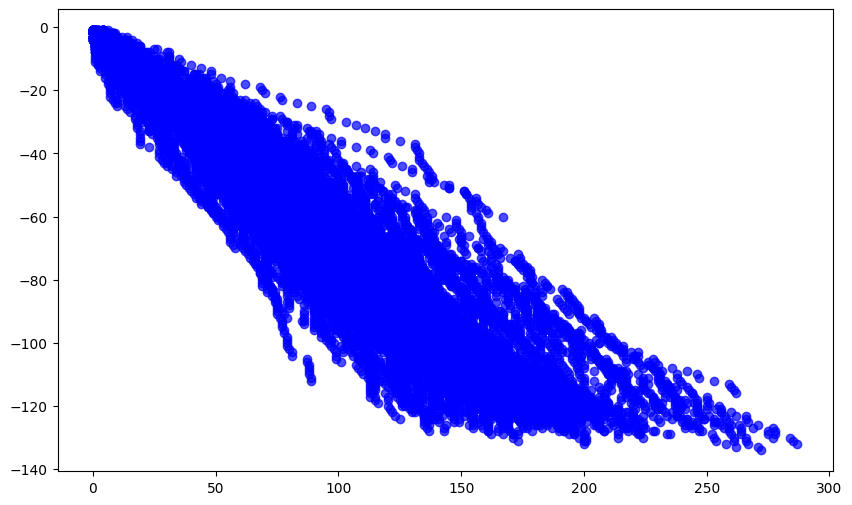

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['runs_scored'],-1*df['ball_number'],  color='b', alpha=0.7)
plt.show()




In [6]:
#train test split
from sklearn.model_selection import train_test_split
# print(df.columns)
X = df[['runs_scored', 'wickets_lost', 'ball_number','team-1','team-2','batting_team','bowling_team','venue']]
y = df['target']



In [10]:
X_train.head()

,runs_scored,wickets_lost,ball_number,team-1,team-2,batting_team,bowling_team,venue
13530,68,2,41,1,8,8,1,0
11592,10,1,18,5,4,4,5,2
12247,62,5,46,3,5,3,5,12
3997,84,2,62,2,6,2,6,9
7750,58,2,29,2,1,1,2,9


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Apply One-Hot Encoding to the 'venue' column
X = pd.get_dummies(X, columns=['venue','team-1', 'team-2', 'batting_team', 'bowling_team','venue'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

y_pred_proba=logreg.predict_proba(X_test)
print(y_pred_proba)
print(X_test.head().to_string())

Accuracy: 0.8076585793627594
[[0.2856111  0.7143889 ]
 [0.0026158  0.9973842 ]
 [0.56432935 0.43567065]
 ...
 [0.17369392 0.82630608]
 [0.48955307 0.51044693]
 [0.77894308 0.22105692]]
       runs_scored  wickets_lost  ball_number  venue_Arun Jaitley Stadium, Delhi  venue_Barsapara Cricket Stadium, Guwahati  venue_Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow  venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam  venue_Eden Gardens, Kolkata  venue_Himachal Pradesh Cricket Association Stadium, Dharamsala  venue_M Chinnaswamy Stadium, Bengaluru  venue_MA Chidambaram Stadium, Chepauk, Chennai  venue_Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur  venue_Narendra Modi Stadium, Ahmedabad  venue_Rajiv Gandhi International Stadium, Uppal, Hyderabad  venue_Sawai Mansingh Stadium, Jaipur  venue_Wankhede Stadium, Mumbai  team-1_CSK  team-1_DC  team-1_GT  team-1_KKR  team-1_LSG  team-1_MI  team-1_PBKS  team-1_RCB  team-1_RR  team-1_SR

In [ ]:
stadiums=[i for i in del_2024['venue'].unique()]
k=0
for i in stadiums:
    k+=1
    print(k,"-",i,end="\n")

print("\n\n")

teams=[i for i in del_2024['batting_team'].unique()]
k=0
for i in teams:
    k+=1
    print(k,"-",i,end="\n")

stadium=int(input("Enter the stadium number: "))
runs=int(input("Enter the runs scored: "))
wickets=int(input("Enter the wickets lost: "))
balls=int(input("Enter the ball number: "))
# print(j,'Teams: ',[i for i in del_2024['batting_team'].unique()])

team_1=int(input("Enter the team-1 number: "))
team_2=int(input("Enter the team-2 number: "))
batting_team=int(input("Enter the batting team number: "))
bowling_team=int(input("Enter the bowling team number: "))


req_series={'runs_scored':runs,'wickets_lost':wickets,'ball_number':balls, 'team-1': teams[team_1-1], 'team-2': teams[team_2-1], 'batting_team': teams[batting_team-1], 'bowling_team': teams[bowling_team-1]}
print(req_series)

for i in stadiums:
    if i !=stadiums[stadium-1]:
        req_series[i]=False
    else:
        req_series[i]=True
print(req_series)

for i in teams:
    if i !=teams[team_1-1]:
        req_series[i]=False
    else:
        req_series[i]=True
print(req_series)

for i in teams:
    if i !=teams[team_2-1]:
        req_series[i]=False
    else:
        req_series[i]=True
print(req_series)


1 - MA Chidambaram Stadium, Chepauk, Chennai, Chennai
2 - Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur, Mohali
3 - Eden Gardens, Kolkata, Kolkata
4 - Sawai Mansingh Stadium, Jaipur, Jaipur
5 - Narendra Modi Stadium, Ahmedabad, Ahmedabad
6 - M Chinnaswamy Stadium, Bengaluru, Bengaluru
7 - Rajiv Gandhi International Stadium, Uppal, Hyderabad, Hyderabad
8 - Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow, Lucknow
9 - Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam, Visakhapatnam
10 - Wankhede Stadium, Mumbai, Mumbai
11 - Arun Jaitley Stadium, Delhi, Delhi
12 - Himachal Pradesh Cricket Association Stadium, Dharamsala, Dharamsala
13 - Barsapara Cricket Stadium, Guwahati, Guwahati



1 - RCB
2 - CSK
3 - DC
4 - PBKS
5 - KKR
6 - SRH
7 - RR
8 - LSG
9 - GT
10 - MI


ValueError: invalid literal for int() with base 10: ''